# IRIS Dataset
## Data Set Information:

This is perhaps the best known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example.) The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

Predicted attribute: class of iris plant.

This is an exceedingly simple domain.

This data differs from the data presented in Fishers article (identified by Steve Chadwick, spchadwick '@' espeedaz.net ). The 35th sample should be: 4.9,3.1,1.5,0.2,"Iris-setosa" where the error is in the fourth feature. The 38th sample: 4.9,3.6,1.4,0.1,"Iris-setosa" where the errors are in the second and third features.


## Attribute Information:

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:
-- Iris Setosa
-- Iris Versicolour
-- Iris Virginica

In [3]:
import urllib
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns;

In [14]:
iris_data = pd.read_csv("iris.data")

In [22]:
iris_data.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [19]:
iris_data.columns = ["SepalLength", "SepalWidth", "PetalLength", "PetalWidth", "Class"]

In [16]:
bzd_data = pd.read_csv("bezdekIris.data")

In [21]:
bzd_data.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [20]:
bzd_data.columns = ["SepalLength", "SepalWidth", "PetalLength", "PetalWidth", "Class"]

## GOAL -
1. To Use this dataset to recognize the flower types. Will be using K-clustering to help in clustering.
2. To compare logistic regression and K-Clustering and which clustering would be more useful.
3. Go Over the EDA to check if there any hypothesis that can be created for each class.

## EDA

First will convert the Class to ClassCode to ensure pairplot

In [25]:
from sklearn.preprocessing import LabelEncoder;

In [26]:
number =LabelEncoder()

In [27]:
iris_data["ClassType"] = number.fit_transform(iris_data["Class"])

In [28]:
iris_data.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class,ClassType
0,4.9,3.0,1.4,0.2,Iris-setosa,0
1,4.7,3.2,1.3,0.2,Iris-setosa,0
2,4.6,3.1,1.5,0.2,Iris-setosa,0
3,5.0,3.6,1.4,0.2,Iris-setosa,0
4,5.4,3.9,1.7,0.4,Iris-setosa,0


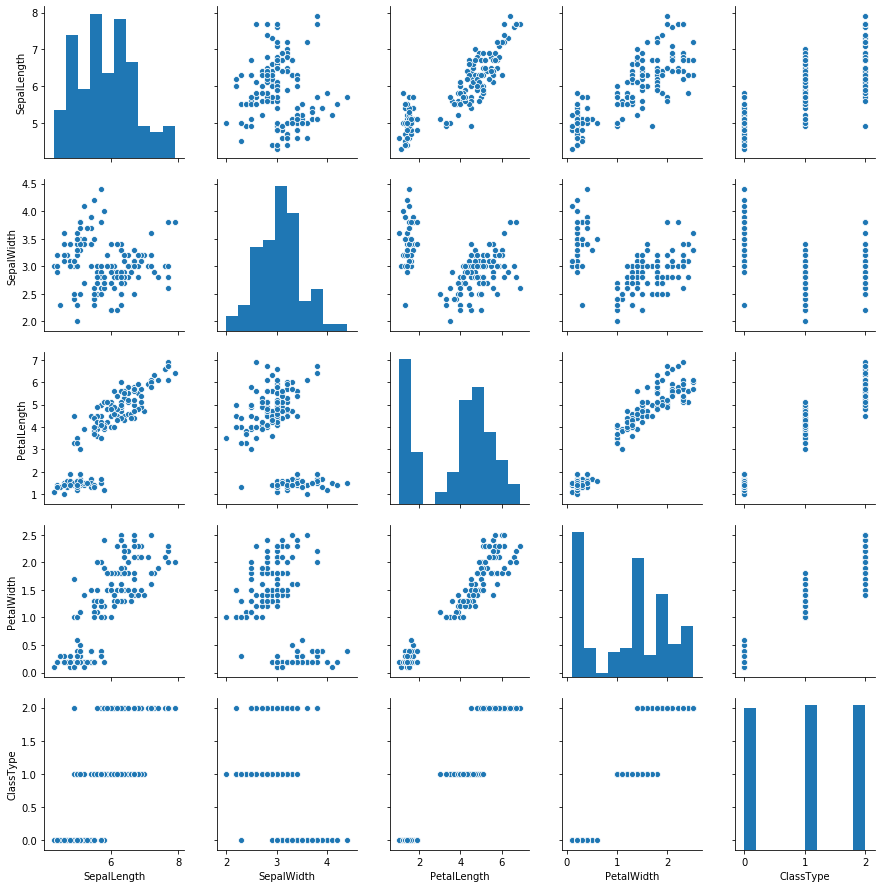

In [29]:
sns.pairplot(iris_data)

In [30]:
iris_data["Class"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Understanding from the given pairplot, it looks like the Iris_setosa is very easily recognizable using lower SepalLength, PetalLength and PetalWidth. 
The rest Iris-versicolor and Iris-virginica are more near by to each other but still lower range of PetalLength, PetalWidth and SepalLength belong to Iris-versicolor and higher values belong to Iris-virginica


Lets try to find some more attributes to classify the data correctly for the Iris-virginica and Iris-Versicolor

In [68]:
iris_data.loc[iris_data["Class"]=="Iris-versicolor"].describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth,ClassType
count,50.000000,50.000000,50.000000,50.000000,50.0
mean,5.936000,2.770000,4.260000,1.326000,1.0
std,0.516171,0.313798,0.469911,0.197753,0.0
min,4.900000,2.000000,3.000000,1.000000,1.0
25%,5.600000,2.525000,4.000000,1.200000,1.0
50%,5.900000,2.800000,4.350000,1.300000,1.0
75%,6.300000,3.000000,4.600000,1.500000,1.0
max,7.000000,3.400000,5.100000,1.800000,1.0


In [69]:
iris_data.loc[iris_data["Class"]=="Iris-virginica"].describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth,ClassType
count,50.00000,50.000000,50.000000,50.00000,50.0
mean,6.58800,2.974000,5.552000,2.02600,2.0
std,0.63588,0.322497,0.551895,0.27465,0.0
min,4.90000,2.200000,4.500000,1.40000,2.0
25%,6.22500,2.800000,5.100000,1.80000,2.0
50%,6.50000,3.000000,5.550000,2.00000,2.0
75%,6.90000,3.175000,5.875000,2.30000,2.0
max,7.90000,3.800000,6.900000,2.50000,2.0


Lets try to find area =Length * width, lets see if that data is able to classify the data.

In [70]:
iris_data["SepalArea"] = iris_data["SepalLength"]* iris_data["SepalWidth"]

In [71]:
iris_data["PetalArea"] = iris_data["PetalLength"]* iris_data["PetalWidth"]

In [72]:
iris_data.loc[iris_data["Class"]=="Iris-virginica", ["SepalArea", "PetalArea"]].describe()

,SepalArea,PetalArea
count,50.000000,50.000000
mean,19.684600,11.296200
std,3.458783,2.157412
min,12.250000,7.500000
25%,17.430000,9.717500
50%,20.060000,11.445000
75%,21.412500,12.790000
max,30.020000,15.870000


In [73]:
iris_data.loc[iris_data["Class"]=="Iris-versicolor", ["SepalArea", "PetalArea"]].describe()

,SepalArea,PetalArea
count,50.000000,50.000000
mean,16.526200,5.720400
std,2.866882,1.368403
min,10.000000,3.300000
25%,14.347500,4.860000
50%,16.385000,5.615000
75%,18.495000,6.750000
max,22.400000,8.640000


In [76]:
iris_data.columns

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Class',
       'ClassType', 'SepalArea', 'PetalArea'],
      dtype='object')

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [78]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_data[['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'SepalArea', 'PetalArea']], iris_data['ClassType'], 
    test_size=0.3, random_state=30)

In [79]:
X_train.shape

(104, 6)

In [80]:
X_test.shape

(45, 6)

In [81]:
kmeans = KMeans(n_clusters=3).fit(X_train)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 5.96956522  2.78913043  4.44782609  1.42826087 16.71173913  6.46521739]
 [ 4.98888889  3.39722222  1.46944444  0.23888889 17.045       0.35694444]
 [ 6.94090909  3.11818182  5.86363636  2.19090909 21.66727273 12.81863636]]


In [82]:
kmeans.labels_

array([0, 0, 1, 0, 1, 1, 0, 0, 2, 1, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 1, 2,
       0, 0, 1, 1, 0, 1, 2, 2, 0, 2, 1, 0, 1, 0, 0, 0, 2, 1, 0, 1, 0, 2,
       0, 0, 1, 1, 0, 2, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 2, 1, 1, 0, 2, 0,
       1, 2, 0, 0, 2, 0, 0, 0, 0, 2, 1, 0, 1, 0, 1, 0, 1, 1, 1, 2, 0, 1,
       1, 0, 2, 0, 2, 2, 1, 0, 2, 1, 2, 0, 2, 2, 1, 1], dtype=int32)

In [85]:
matched_df = pd.DataFrame(list(zip(y_train, kmeans.labels_)), columns=["CorrectLabels", "PredictedLabels"])

In [88]:
matched_df.head()

,CorrectLabels,PredictedLabels
0,1,0
1,1,0
2,0,1
3,1,0
4,0,1


In [87]:
firstTag = "";
secondTag = "";
thirdTag = "";

In [93]:
from collections import Counter

In [100]:
firstTag = Counter(matched_df.loc[matched_df["CorrectLabels"]==0, "PredictedLabels"]).most_common(1)[0][0]
secondTag = Counter(matched_df.loc[matched_df["CorrectLabels"]==1, "PredictedLabels"]).most_common(1)[0][0]
thirdTag = Counter(matched_df.loc[matched_df["CorrectLabels"]==2, "PredictedLabels"]).most_common(1)[0][0]

In [101]:
print(firstTag)
print(secondTag)
print(thirdTag)

1
0
2


<b>Percentage of wrongly clustered data</b>

For Iris_setosa all the labels are clustered correctly

In [103]:
len(matched_df.loc[(matched_df["CorrectLabels"]==0) & (matched_df["PredictedLabels"]==firstTag)])/len(matched_df.loc[(matched_df["CorrectLabels"]==0)])

1.0

In [104]:
len(matched_df.loc[(matched_df["CorrectLabels"]==1) & (matched_df["PredictedLabels"]==secondTag)])/len(matched_df.loc[(matched_df["CorrectLabels"]==1)])

1.0

In [105]:
len(matched_df.loc[(matched_df["CorrectLabels"]==2) & (matched_df["PredictedLabels"]==thirdTag)])/len(matched_df.loc[(matched_df["CorrectLabels"]==2)])

0.7096774193548387

With the area, its able to classify even better, lets look at what other kind of features can be created for matching the last class correctly.

Lets see how much is accuracy in total

In [109]:
len(matched_df.loc[(matched_df["CorrectLabels"]==2) & (matched_df["PredictedLabels"]!=thirdTag)])/len(matched_df)

0.08653846153846154

Thus overall only around 8% of data are not predicted correctly

Lets check if area is only sufficient to predict the clusters

In [112]:
iris_data.columns

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Class',
       'ClassType', 'SepalArea', 'PetalArea'],
      dtype='object')

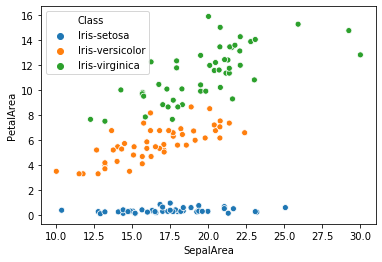

In [113]:
sns.scatterplot(iris_data["SepalArea"], iris_data["PetalArea"], hue=iris_data["Class"])

Lets check if the given data works for the other dataset

In [114]:
bzd_data.columns

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Class'], dtype='object')

In [115]:
bzd_data["SepalArea"] = bzd_data["SepalLength"]* bzd_data["SepalWidth"]
bzd_data["PetalArea"] = bzd_data["PetalLength"]* bzd_data["PetalWidth"]

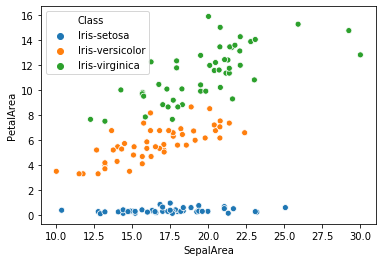

In [116]:
sns.scatterplot(bzd_data["SepalArea"], bzd_data["PetalArea"], hue=bzd_data["Class"])